In [46]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


2. Check info of the DataFrame and identify following:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(a) columns with dtypes=object


In [5]:
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')



(b) unique values of those columns.


In [6]:
for col in object_cols:
  print(col,df[col].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']
y ['no' 'yes']



(c) check for the total number of null values in each column.

In [7]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”

In [8]:
numeric_df = df.drop(columns=object_cols)
numeric_df.to_csv("banknumericdata.csv",index=False)

4. Read ”banknumericdata.csv” and Find the summary statistics.

In [20]:
df1 =pd.read_csv("banknumericdata.csv")
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.

In [21]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/medical_students_dataset.csv")
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


2. Check info of the DataFrame and identify column with missing (null) values.

In [ ]:
df.isnull().sum()

,0
Student ID,20000
Age,20000
Gender,20000
Height,20000
Weight,20000
Blood Type,20000
BMI,20000
Temperature,20000
Heart Rate,20000
Blood Pressure,20000


3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.

In [ ]:
df["Age"] = df["Age"] .fillna(df["Age"].median())
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,26.0,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,26.0,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"


In [23]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [24]:
subset =df[["Name","Pclass","Sex","Age","Fare","Survived"]]
subset


,Name,Pclass,Sex,Age,Fare,Survived
0,"Braund, Mr. Owen Harris",3,male,22.0,7.2500,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
2,"Heikkinen, Miss. Laina",3,female,26.0,7.9250,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
4,"Allen, Mr. William Henry",3,male,35.0,8.0500,0
...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",2,male,27.0,13.0000,0
887,"Graham, Miss. Margaret Edith",1,female,19.0,30.0000,1
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,23.4500,0
889,"Behr, Mr. Karl Howell",1,male,26.0,30.0000,1


In [ ]:
df1 = subset[subset['Pclass'] == 1]


In [ ]:

mean_fare = df1['Fare'].mean()
median_fare = df1['Fare'].median()
max_fare =df1['Fare'].max()
min_fare = df1['Fare'].min()

print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Max Fare:", max_fare)
print("Min Fare:", min_fare)

Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Max Fare: 512.3292
Min Fare: 0.0


Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
missing_age=subset['Age'].isnull().sum()
print("missing age: ",missing_age)

missing age:  177


In [ ]:
subset=subset.dropna(subset=['Age'])
print(subset)

                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
885               Rice, Mrs. William (Margaret Norton)       3  female  39.0   
886                              Montvila, Rev. Juozas       2    male  27.0   
887                       Graham, Miss. Margaret Edith       1  female  19.0   
889                              Behr, Mr. Karl Howell       1    male  26.0   
890                                Dooley, Mr. Patrick       3    male  32.0   

        Fare  Survived  
0     7.2500  

In [25]:
print(subset['Age'].isnull().sum())

177


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).

In [26]:

print(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [27]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df1 = pd.concat([df, embarked_dummies], axis=1)
print(df1[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True


2. Add these new columns to the original DataFrame.

In [28]:

df = pd.concat([df, embarked_dummies], axis=1)
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


3. Drop the original ’Embarked’ column.

In [29]:

df = df.drop('Embarked', axis=1)

4. Print the first few rows of the modified DataFrame to verify the changes.

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

In [31]:
import matplotlib.pyplot as plt

mean_survival = df.groupby('Sex')['Survived'].mean()
print(mean_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


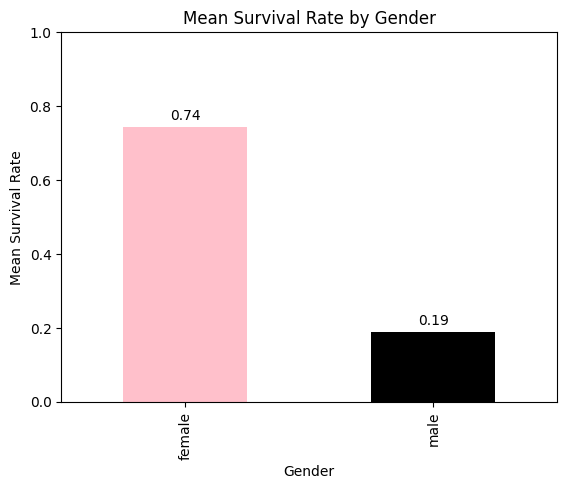

In [33]:

mean_survival.plot(kind='bar', color=['pink', 'black'])

plt.title('Mean Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)


for i, v in enumerate(mean_survival):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

In [47]:

df=pd.read_csv("/content/drive/MyDrive/Concepts and Technologies of AI/Titanic-Dataset.csv")
survival_by_port_gender = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
print(survival_by_port_gender)


Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603


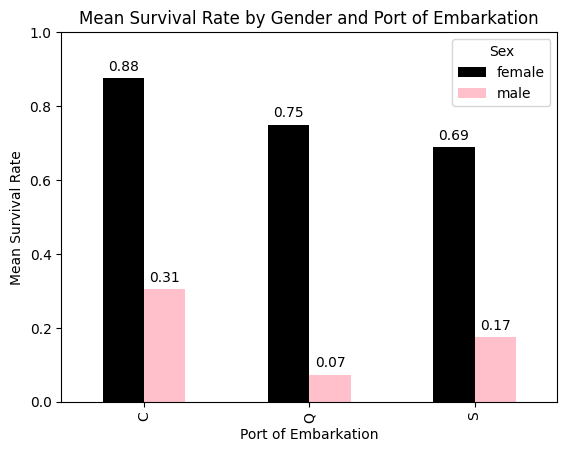

In [36]:
survival_by_port_gender.plot(kind='bar', color=['black', 'pink'])

plt.title('Mean Survival Rate by Gender and Port of Embarkation')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Port of Embarkation')
plt.ylim(0, 1)

for i, port in enumerate(survival_by_port_gender.index):
    for j, sex in enumerate(survival_by_port_gender.columns):
        value = survival_by_port_gender.loc[port, sex]
        plt.text(i + j*0.25 - 0.125, value + 0.02, f"{value:.2f}", ha='center')

plt.legend(title='Sex')
plt.show()

Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.

In [39]:
df = df.dropna(subset=['Age', 'Pclass'])

In [ ]:
df['AgeGroup'] = pd.qcut(df['Age'], 5)
print(df[['Age', 'AgeGroup']].head())

    Age      AgeGroup
0  22.0  (19.0, 25.0]
1  38.0  (31.8, 41.0]
2  26.0  (25.0, 31.8]
3  35.0  (31.8, 41.0]
4  35.0  (31.8, 41.0]


In [45]:

df = df.dropna(subset=['Age', 'Pclass'])

df['AgeGroup'] = pd.qcut(df['Age'], 5)

survival_by_age_pclass = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()
print(survival_by_age_pclass)



Pclass                1         2         3
AgeGroup                                   
(0.419, 19.0]  0.809524  0.742857  0.333333
(19.0, 25.0]   0.761905  0.400000  0.197674
(25.0, 31.8]   0.666667  0.416667  0.283582
(31.8, 41.0]   0.777778  0.461538  0.166667
(41.0, 80.0]   0.506667  0.363636  0.088235


/tmp/ipython-input-1519257131.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_pclass = df.groupby(['AgeGroup', 'Pclass'])['Survived'].mean().unstack()


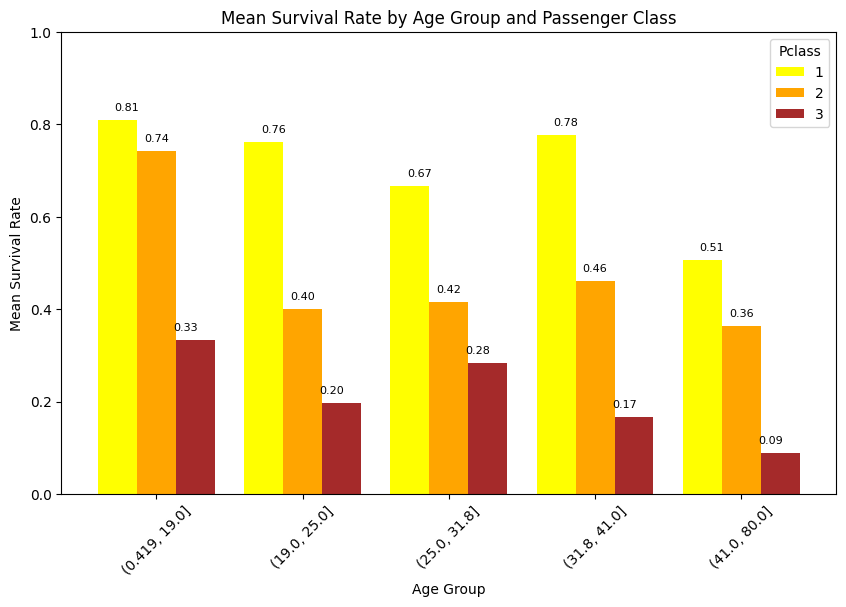

In [44]:

survival_by_age_pclass.plot(kind='bar', figsize=(10,6), width=0.8,color=['yellow', 'orange','brown'])

plt.title('Mean Survival Rate by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Mean Survival Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, age_group in enumerate(survival_by_age_pclass.index):
    for j, pclass in enumerate(survival_by_age_pclass.columns):
        value = survival_by_age_pclass.loc[age_group, pclass]
        plt.text(i + j*0.2 - 0.2, value + 0.02, f"{value:.2f}", ha='center', fontsize=8)

plt.legend(title='Pclass')
plt.show()